# SRM 641 Python Week 5 - Machine Learning 1

### By the end of this week, you should be able to:
- Define machine learning 
- Understand machine learning models 
- Use Scikit-Learn packages to analyze data

## Machine Learning

In machine learning (hereby ML), algorithms learn to predict values from data. According to Jake VanderPlas "in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of building models of data." Machine learning can be categorized into two main types: supervised learning and unsupervised learning. In supervised learning, we model the relationship between features/variables of data and some label associated with the data, the model can then be used to apply labels to new, unknown data. These can be classification or regression tasks. Unsupervised learning involves modeling the features of a dataset without reference to any label. These models include tasks such as clustering and dimensionality reduction. 

### Scikit-Learn
There are several Python libraries which provide implementations of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms.

See https://scikit-learn.org/stable/ for more info.



### Basics of the Scikit-Learn API

The steps in using the Scikit-Learn estimator API are as follows:

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector following the discussion above.
- Fit the model to your data by calling the fit() method of the model instance.
- Apply the Model to new data:
- For supervised learning, often we predict labels for unknown data using the predict() method.
- For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

Machine learning is about creating models from data. We'll start by discussing how data can be represented in order to be understood by the computer.

In [1]:
# Let's import the Iris dataset

# Library
import seaborn as sns

# Load data
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [7]:
# View the data

iris.shape # (150 rows, 5 columns)

(150, 5)

Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In ML, we will refer to the rows of the matrix as samples, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as `n_features`.

The information can be thought of as a two-dimensional numerical array or matrix, which we will call the features matrix. By convention, this features matrix is often stored in a variable named X. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas DataFrame.

In addition to the feature matrix `X`, we also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas Series. 

In [3]:
# ignore warnings

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# Need to install scikit learn if you havent yet.

#conda install scikit-learn

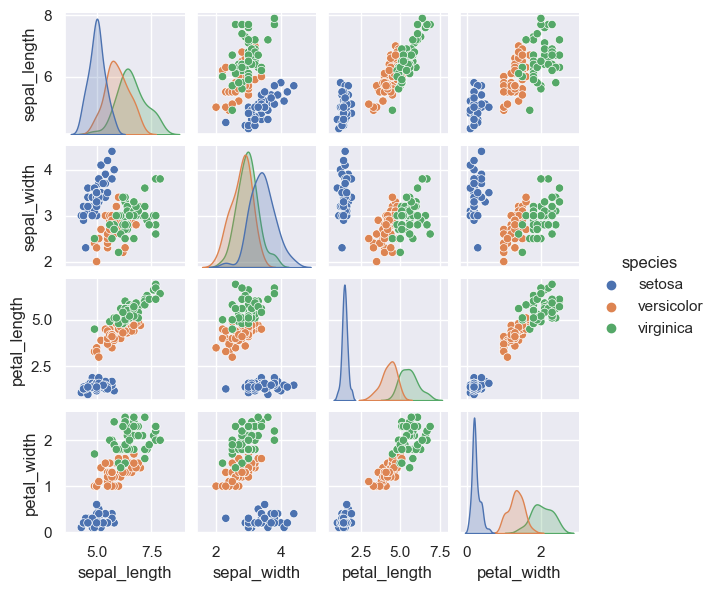

In [4]:
# Let's visualize our data

%matplotlib inline
import seaborn as sns; sns.set()

# Plot
sns.pairplot(iris, hue='species', size=1.5)

### Supervised learning example: Iris classification

Problem statement: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

Model: we will use a simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models. 
See for more info: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes


To predict the species we can use Scikit-Learn. Let's extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas DataFrame operations: 

In [5]:
# create X (features matrix) - the columns minus the target variable species

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
# Create y (labels) - DV

y_iris = iris['species']
y_iris.shape

(150,)

The data is now transformed and ready for modeling.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set using the `train_test_split` utility function:

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels

In [12]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy of 97%, this naive classification algorithm is effective for this particular dataset.

### Unsupervised learning example: Iris dimensionality

Let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data.

We will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.
For more info on PCA see: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#

In [14]:
# Using the iris dataset

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions


Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's `lmplot` to show the results:

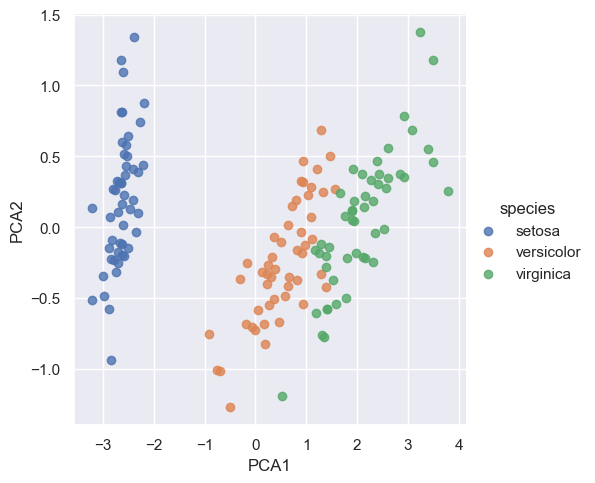

In [17]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue='species', data=iris, fit_reg=False)

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels. This indicates that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

References:

- https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
- https://scikit-learn.org/stable/user_guide.html
